#Importamos Librerias y montamos a nuestra base de datos

In [ ]:
import numpy as np
from tensorflow import keras
#from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ub="/content/drive/MyDrive/DataSets/"

#Fase 1: Acondicionamiento de la base de Datos

## Extraemos las descripciones de los Alimentos

In [ ]:
burritos=pd.read_csv(ub+"PruebaComida/Labels/burritos.csv",header=None)
chiles_en_nogada=pd.read_csv(ub+"PruebaComida/Labels/chiles_en_nogada.csv",header=None)
enchiladas=pd.read_csv(ub+"PruebaComida/Labels/enchiladas.csv",header=None)
gorditas_de_nata=pd.read_csv(ub+"PruebaComida/Labels/gorditas_de_nata.csv",header=None)
mole_poblano=pd.read_csv(ub+"PruebaComida/Labels/mole_poblano.csv",header=None)
pozole=pd.read_csv(ub+"PruebaComida/Labels/pozole.csv",header=None)
quesadillas=pd.read_csv(ub+"PruebaComida/Labels/quesadillas.csv",header=None)
sopes=pd.read_csv(ub+"PruebaComida/Labels/sopes.csv",header=None)
tacos_campechanos=pd.read_csv(ub+"PruebaComida/Labels/tacos_campechanos.csv",header=None)
tamales=pd.read_csv(ub+"PruebaComida/Labels/tamales.csv",header=None)

Unimos las descripciones

In [ ]:
Antojitos=pd.concat([burritos,chiles_en_nogada,enchiladas,gorditas_de_nata,mole_poblano,pozole,quesadillas,sopes,tacos_campechanos,tamales],axis=0)
Antojitos

,0
0,burrito relleno de carne al pastor con piña y ...
1,plato con burritos rellenos de carne con pimie...
2,delicioso burrito de carne con chile y queso
3,vista frontal de corte de burrito relleno de c...
4,plato de burritos tradicionales rellenos de ca...
...,...
95,preparacion de varios tamales en una casa
96,un tamal de verduras
97,un tamal de verduras oaxaqueño
98,un tamal de tinga


##Creación del Banco de palabras

Conversion de Oraciones a números

In [ ]:
Oraciones=[]
for i in range(len(Antojitos)):
  Oraciones.append(Antojitos.iloc[i,0])

token=Tokenizer()
token.fit_on_texts(Oraciones)

banco_palabras=token.word_index
banco_palabras

{'de': 1,
 'con': 2,
 'y': 3,
 'en': 4,
 'queso': 5,
 'plato': 6,
 'un': 7,
 'carne': 8,
 'lechuga': 9,
 'pollo': 10,
 'chile': 11,
 'salsa': 12,
 'relleno': 13,
 'mole': 14,
 'nata': 15,
 'pozole': 16,
 'nogada': 17,
 'enchiladas': 18,
 'tacos': 19,
 'verde': 20,
 'gorditas': 21,
 'una': 22,
 'arroz': 23,
 'poblano': 24,
 'burrito': 25,
 'perejil': 26,
 'rojo': 27,
 'frijoles': 28,
 'encima': 29,
 'harina': 30,
 'granada': 31,
 'sopes': 32,
 'crema': 33,
 'tamales': 34,
 'cebolla': 35,
 'tradicional': 36,
 'sobre': 37,
 'quesadillas': 38,
 'jitomate': 39,
 'aguacate': 40,
 'toppings': 41,
 'tortilla': 42,
 'barro': 43,
 'tamal': 44,
 'cilantro': 45,
 'tres': 46,
 'cubierto': 47,
 'roja': 48,
 'maiz': 49,
 'limon': 50,
 'masa': 51,
 'acompañado': 52,
 'sin': 53,
 'ajonjoli': 54,
 'lado': 55,
 'rabanos': 56,
 'dos': 57,
 'a': 58,
 'limones': 59,
 'rellenos': 60,
 'pico': 61,
 'gallo': 62,
 'rabano': 63,
 'varios': 64,
 'blanco': 65,
 'burritos': 66,
 'verdes': 67,
 'quesadilla': 68,
 'r

In [ ]:
len(banco_palabras)

784

## Importacion de Imagenes de Alimentos

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
im_burritos=load_images_from_folder(ub+"PruebaComida/burritos/")
im_chiles_en_nogada=load_images_from_folder(ub+"PruebaComida/chiles_en_nogada/")
im_enchiladas=load_images_from_folder(ub+"PruebaComida/enchiladas/")
im_gorditas_de_nata=load_images_from_folder(ub+"PruebaComida/gorditas_de_nata/")
im_mole_poblano=load_images_from_folder(ub+"PruebaComida/mole_poblano/")
im_pozole=load_images_from_folder(ub+"PruebaComida/pozole/")
im_quesadillas=load_images_from_folder(ub+"PruebaComida/quesadillas/")
im_sopes=load_images_from_folder(ub+"PruebaComida/sopes/")
im_tacos_campechanos=load_images_from_folder(ub+"PruebaComida/tacos_campechanos/")
im_tamales=load_images_from_folder(ub+"PruebaComida/tamales/")

Guardamos las imagenes en un solo array con tamaño predeterminado

In [ ]:
def unificador(Tamano,imagenes,ar):
  for imagen in imagenes:
    imagen = cv2.resize(imagen, (Tamano, Tamano))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    ar.append(imagen)
  return ar

In [ ]:
Tamano=100

im_antojitos=[]

im_antojitos=unificador(Tamano,im_burritos,im_antojitos)
im_antojitos=unificador(Tamano,im_chiles_en_nogada,im_antojitos)
im_antojitos=unificador(Tamano,im_enchiladas,im_antojitos)
im_antojitos=unificador(Tamano,im_gorditas_de_nata,im_antojitos)
im_antojitos=unificador(Tamano,im_mole_poblano,im_antojitos)
im_antojitos=unificador(Tamano,im_pozole,im_antojitos)
im_antojitos=unificador(Tamano,im_quesadillas,im_antojitos)
im_antojitos=unificador(Tamano,im_sopes,im_antojitos)
im_antojitos=unificador(Tamano,im_tacos_campechanos,im_antojitos)
im_antojitos=unificador(Tamano,im_tamales,im_antojitos)


Normalizamos las imagenes para un mejor desempeño

In [ ]:
prueba=np.array(im_antojitos).astype(float)/255
print(prueba.shape)

(1000, 100, 100, 3)


## Aumento del dataframe a 10 veces su tamaño

In [ ]:
tamanosecuencia=25
secuencia=token.texts_to_sequences(Oraciones)
for i in secuencia:
  if len(i) < tamanosecuencia:
    for j in range(tamanosecuencia-len(i)):
      i.append(0)

Aumento del banco de imagenes mediante transformaciones de una misma

In [ ]:
#Realizar el aumento de datos con varias transformaciones.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True

)

datagen.fit(prueba)

plt.figure()

j=0
for i in range(9):
  print("iteracion",i,":-------------------------------------------------------------------\n ")
  for imagen in datagen.flow(prueba, batch_size=1000, shuffle=False):
    for generado in imagen:
      im_antojitos.append(generado)
    break




prueba=np.array(im_antojitos).astype(float)/255
print(prueba.shape)


iteracion 0 :-------------------------------------------------------------------
 
iteracion 1 :-------------------------------------------------------------------
 
iteracion 2 :-------------------------------------------------------------------
 
iteracion 3 :-------------------------------------------------------------------
 
iteracion 4 :-------------------------------------------------------------------
 
iteracion 5 :-------------------------------------------------------------------
 
iteracion 6 :-------------------------------------------------------------------
 
iteracion 7 :-------------------------------------------------------------------
 
iteracion 8 :-------------------------------------------------------------------
 


Aumento de descripciones

In [ ]:
Antojitos=pd.concat([Antojitos,Antojitos,Antojitos,Antojitos,Antojitos,Antojitos,Antojitos,Antojitos,Antojitos,Antojitos],axis=0)
Antojitos

,0
0,burrito relleno de carne al pastor con piña y ...
1,plato con burritos rellenos de carne con pimie...
2,delicioso burrito de carne con chile y queso
3,vista frontal de corte de burrito relleno de c...
4,plato de burritos tradicionales rellenos de ca...
...,...
95,preparacion de varios tamales en una casa
96,un tamal de verduras
97,un tamal de verduras oaxaqueño
98,un tamal de tinga


# Creacion del Modelo y entrenamiento del mismo

Ponemos un punto de guardado

In [ ]:
guardado=ModelCheckpoint(ub+"PruebaComida/Modelosh5/modelo_epoch_{epoch}.h5",save_freq='epoch',period=500,verbose=1)

## Creamos el modelo neuronal

In [ ]:
modelo = keras.models.Sequential([
 keras.layers.Embedding(input_dim=len(banco_palabras), output_dim=1200, input_length=tamanosecuencia),
 keras.layers.LSTM(1200,dropout=0.1, recurrent_dropout=0.2, return_sequences=True),
 keras.layers.LSTM(1200,dropout=0.1, recurrent_dropout=0.2, return_sequences=True),
 keras.layers.Reshape((100,100,3)),
 keras.layers.Dropout(0.1),
 keras.layers.Conv2D(3, (20, 20), activation='relu',padding="same"),
 keras.layers.MaxPooling2D((2,2), strides=1 , padding="same"),
 keras.layers.Conv2D(3, (5, 5), activation='relu',padding="same"),
])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 1200)          940800    
                                                                 
 lstm_6 (LSTM)               (None, 25, 1200)          11524800  
                                                                 
 lstm_7 (LSTM)               (None, 25, 1200)          11524800  
                                                                 
 reshape_3 (Reshape)         (None, 100, 100, 3)       0         
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 3)       3603      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 100, 100, 3)      

## Entrenamiento de la Red

In [ ]:
modelo.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['acc'] )
secuencia = np.array(secuencia)
print(secuencia.shape)
modelo.fit(secuencia, prueba, epochs=10000, verbose=1,batch_size=100,validation_split=0.2,callbacks=[guardado])


Se truncaron las últimas líneas 5000 del resultado de transmisión.
8/8 [==============================] - 2s 222ms/step - loss: 0.0119 - acc: 0.8136 - val_loss: 0.1139 - val_acc: 0.7141
Epoch 5997/10000
8/8 [==============================] - 2s 221ms/step - loss: 0.0119 - acc: 0.8125 - val_loss: 0.1135 - val_acc: 0.7246
Epoch 5998/10000
8/8 [==============================] - 2s 223ms/step - loss: 0.0119 - acc: 0.8127 - val_loss: 0.1134 - val_acc: 0.7218
Epoch 5999/10000
8/8 [==============================] - 2s 221ms/step - loss: 0.0119 - acc: 0.8125 - val_loss: 0.1143 - val_acc: 0.7246
Epoch 6000/10000
8/8 [==============================] - ETA: 0s - loss: 0.0119 - acc: 0.8135
Epoch 6000: saving model to /content/drive/MyDrive/DataSets/PruebaComida/Modelosh5/modelo_epoch_6000.h5
8/8 [==============================] - 2s 310ms/step - loss: 0.0119 - acc: 0.8135 - val_loss: 0.1120 - val_acc: 0.7289
Epoch 6001/10000
8/8 [==============================] - 2s 224ms/step - loss: 0.0120 - acc

#Resultados Obtenidos

[[681, 2, 111, 3, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
1/1 [==============================] - 1s 766ms/step


(1, 100, 100, 3)


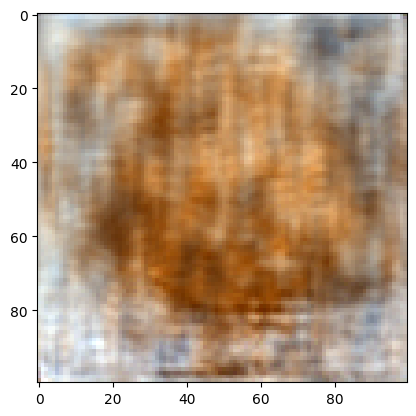

In [ ]:
label="taquitos con papas y cebolla rica"
label=token.texts_to_sequences([label])
for i in label:
  if len(i) < tamanosecuencia:
    for j in range(tamanosecuencia-len(i)):
      i.append(0)
print(label)
imagen=modelo.predict(label)
print(imagen.shape)
imagen=imagen.reshape((100,100,3))
plt.imshow(imagen)

[[681, 2, 111, 3, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
1/1 [==============================] - 0s 50ms/step


(1, 100, 100, 3)


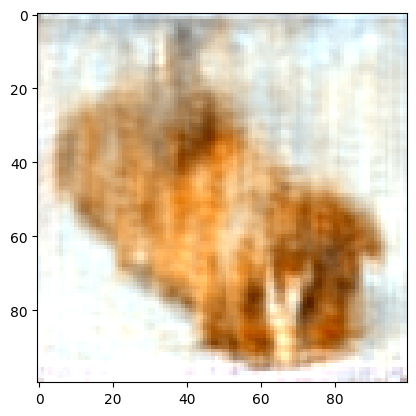

In [ ]:
label="taquitos con papas y cebolla rica"
label=token.texts_to_sequences([label])
for i in label:
  if len(i) < tamanosecuencia:
    for j in range(tamanosecuencia-len(i)):
      i.append(0)
print(label)
imagen=modelo.predict(label)
print(imagen.shape)
imagen=imagen.reshape((100,100,3))
plt.imshow(imagen)

[[21, 1, 15, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
1/1 [==============================] - 0s 36ms/step
(1, 100, 100, 3)


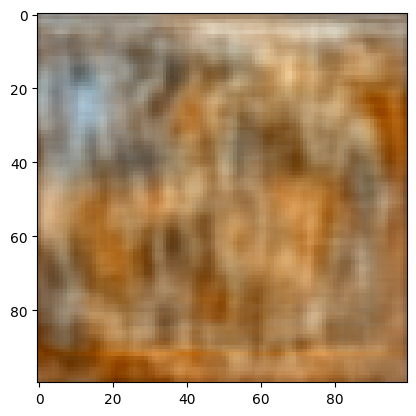

In [ ]:
label="gorditas de nata rellenas"
label=token.texts_to_sequences([label])
for i in label:
  if len(i) < tamanosecuencia:
    for j in range(tamanosecuencia-len(i)):
      i.append(0)
print(label)
imagen=modelo.predict(label)
print(imagen.shape)
imagen=imagen.reshape((100,100,3))
plt.imshow(imagen)

[[14, 24, 2, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
1/1 [==============================] - 0s 36ms/step


(1, 100, 100, 3)


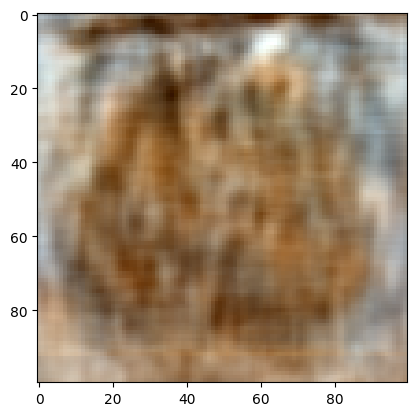

In [ ]:
label="mole poblano con arroz"
label=token.texts_to_sequences([label])
for i in label:
  if len(i) < tamanosecuencia:
    for j in range(tamanosecuencia-len(i)):
      i.append(0)
print(label)
imagen=modelo.predict(label)
print(imagen.shape)
imagen=imagen.reshape((100,100,3))
plt.imshow(imagen)

## Guardamos Modelo

In [ ]:
modelo.save(ub+"PruebaComida/modelov5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
